In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
with open("data.csv") as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    # next(reader, None)  # skip the headers
    data = np.array([row for row in reader])
with open("clustering.csv") as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    # next(reader, None)  # skip the headers
    clustering = np.array([row for row in reader])
with open("meanPoints.csv") as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    # next(reader, None)  # skip the headers
    meanPoints = np.array([row for row in reader])


In [4]:
data = data[:,:-1].astype(np.float)
meanPoints=meanPoints[:,:-1].astype(np.float)
clustering = clustering[0][:-1].astype(np.int)


Data Preprocessing (Do not run if you only want to visualize data)

In [128]:
with open("./MNIST/train.csv") as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    # next(reader, None)  # skip the headers
    mt = np.array([row for row in reader])
with open("./archive/fashion-mnist_train.csv") as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    # next(reader, None)  # skip the headers
    fmt = np.array([row for row in reader])
digit_labels = mt[:,0]
fashion_labels = fmt[:,0]
mt = mt[:,1:].astype(np.int)
fmt = fmt[:,1:].astype(np.int)
with open("fashion_train.csv","w") as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerows(fmt)
with open("digits_train.csv","w") as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerows(mt)

Visualization for Random Data

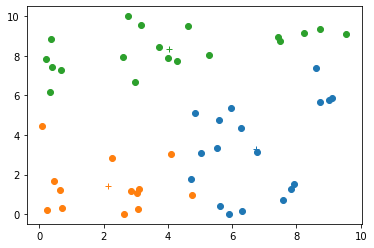

In [143]:
cmap = plt.get_cmap("tab10")
for i in range(len(data)):
    plt.plot(data[i][0],data[i][1],'o',color=cmap(clustering[i]))
for i in range(len(meanPoints)):
    plt.plot(meanPoints[i][0],meanPoints[i][1],'+')

Visualization for K Mean Points.

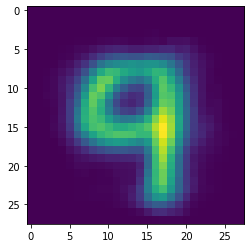

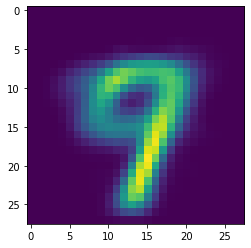

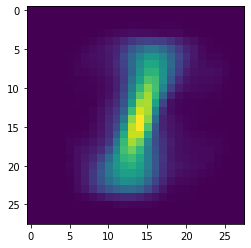

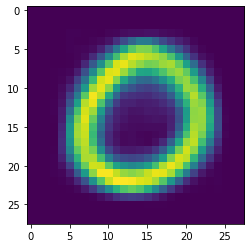

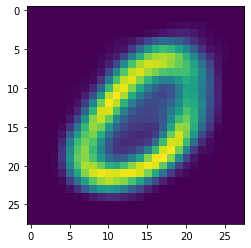

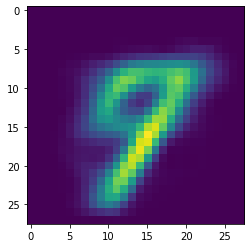

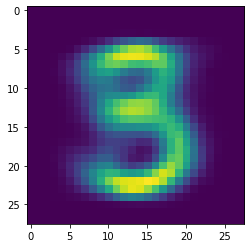

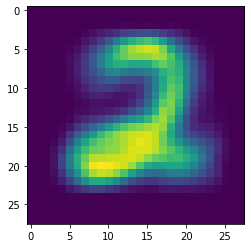

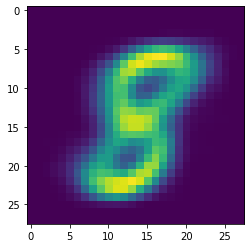

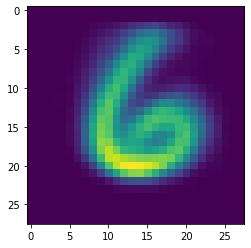

In [5]:
k=10
for i in range(k):
    img = meanPoints[i].reshape((28,28))
    plt.imshow(img)
    plt.show()

In [9]:
print(meanPoints.shape)

(10, 784)


In [8]:
clustering

array([9, 6, 5, ..., 3, 8, 8])

In [7]:
DVar=[13150349407.772015,10427486293.650331,8950272007.227800,8136980200.315476,7602807669.037461,7087784872.263699,6817322068.751112
,6523394039.407559,6331650376.624564,6189784012.136992,6078588341.155793,5801183146.456343,5755310742.943164,5678537055.428457,5598959091.297526]
DNormalTime=[2.169407,2.776408,3.440734,4.022579,4.622399,5.202754,5.848332,6.408083,7.019815,7.618833,8.395473,8.843272,9.461127,10.037480,11.334194]
DParallelTime=[2.239157,2.309394,2.457883,2.533498,2.651086,2.732596,2.853712,2.969790,3.055801,3.203223,3.277904,3.408211,3.461783,3.577844,3.817379]

In [8]:
DVar = np.array(DVar)
DNormalTime = np.array(DNormalTime)
DParallelTime = np.array(DParallelTime)

---ALL TESTS RUN IN MY COMPUTER FOR 250 ITERATIONS---


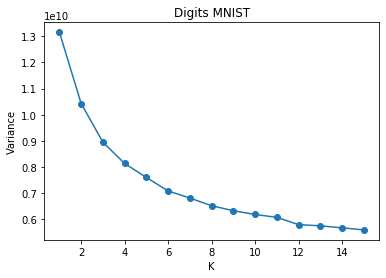

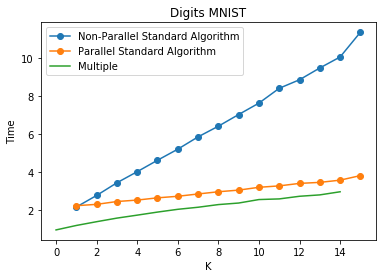

In [9]:
print("---ALL TESTS RUN IN MY COMPUTER FOR 250 ITERATIONS---")
k = [i+1 for i in range(15)]
plt.gca(ylabel='Variance',xlabel='K',title='Digits MNIST')
plt.plot(k,DVar,'-o')
plt.show()
plt.gca(ylabel='Time',xlabel='K',title='Digits MNIST')
plt.plot(k,DNormalTime,label='Non-Parallel Standard Algorithm',linestyle='-',marker='o')
plt.plot(k,DParallelTime,label='Parallel Standard Algorithm',linestyle='-',marker='o')

plt.plot(DNormalTime/DParallelTime,label='Multiple',linestyle='-')
plt.legend()